Hello Brandon!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Your project is really nice one. You have only one mistake to fix. Except this mistake everything else is done perfectly
</div>

# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import math

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [2]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [3]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [4]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
3111,0,25.0,55100.0,2,0
861,0,39.0,29600.0,1,0
1624,0,24.0,34300.0,2,0
161,0,41.0,31200.0,2,0
1195,0,30.0,29400.0,1,0
692,0,25.0,51600.0,0,0
3305,1,31.0,46600.0,0,0
1643,0,21.0,52600.0,1,0
4883,0,47.0,55600.0,3,1
4194,1,26.0,39100.0,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:
df['age'] = df['age'].astype(int)

In [7]:
# check to see that the conversion was successful

In [8]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [9]:
df.duplicated().sum()

153

There are 153 duplicates

In [10]:
df[df.duplicated()].head()

,gender,age,income,family_members,insurance_benefits
281,1,39,48100.0,1,0
488,1,24,32900.0,1,0
513,0,31,37400.0,2,0
718,1,22,32600.0,1,0
785,0,20,35800.0,0,0


In [11]:
df.shape

(5000, 5)

In [12]:
df = df.drop_duplicates()

dropping duplicates

In [13]:
df.shape

(4847, 5)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good initial review and preprocessing.
</div>

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

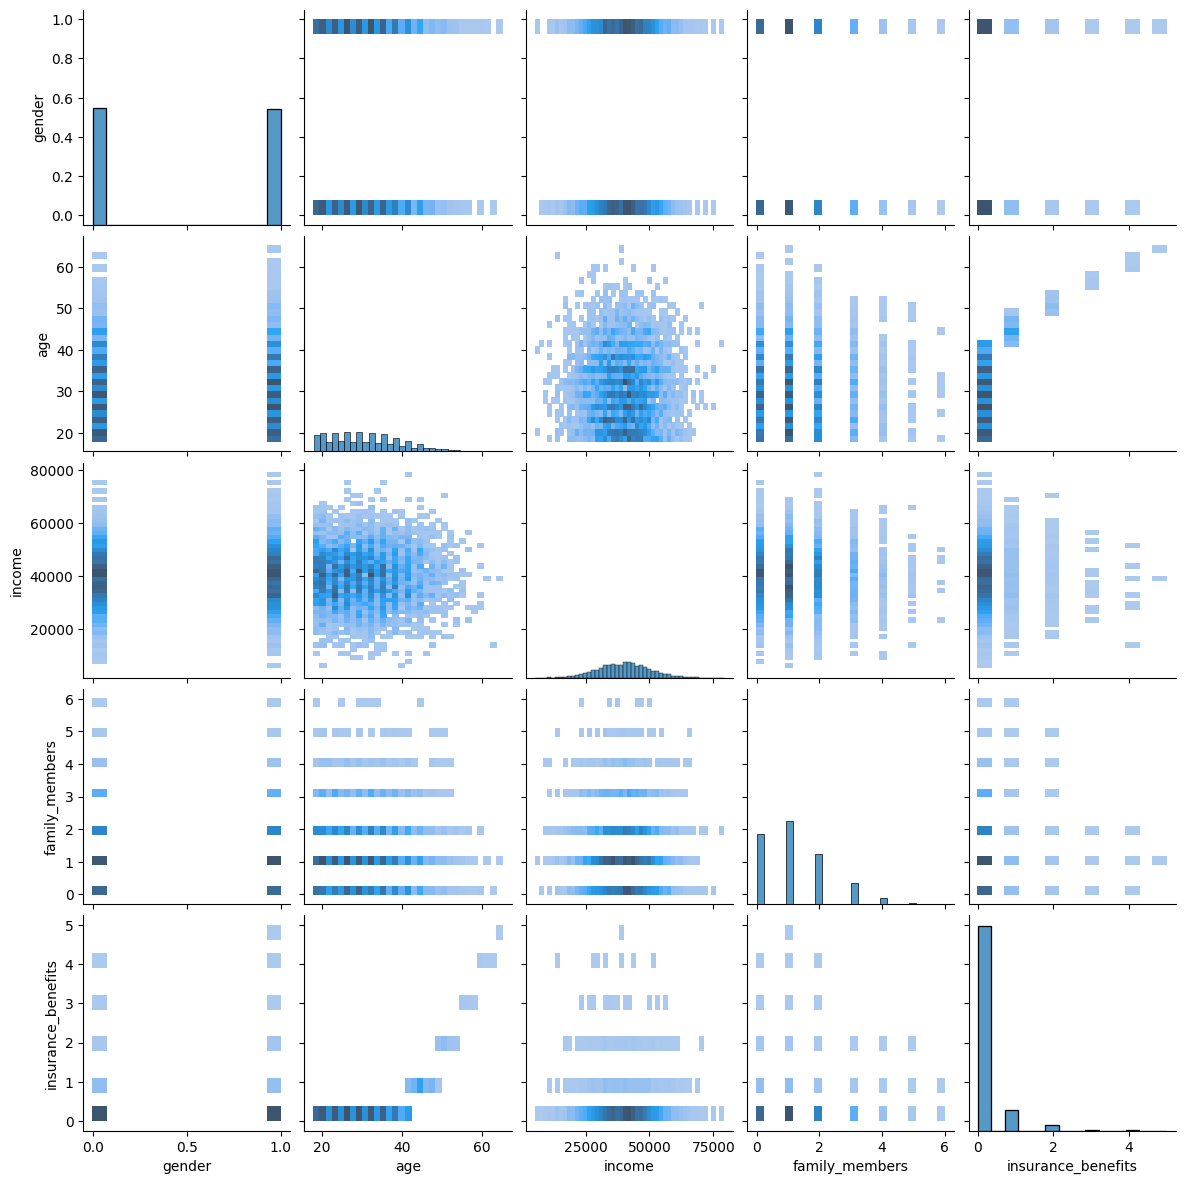

In [14]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

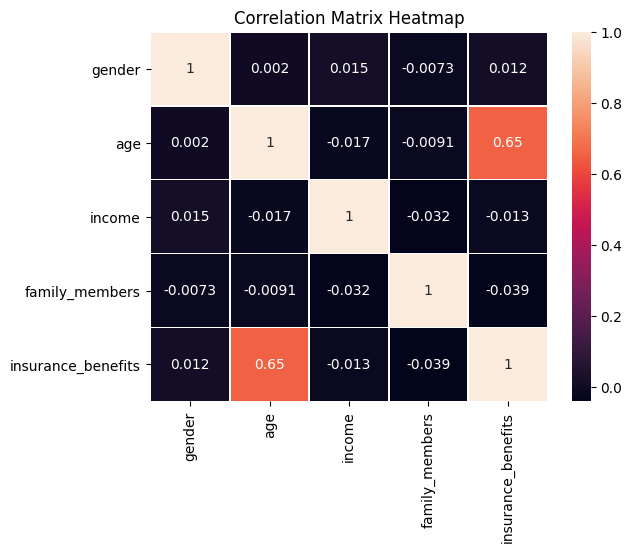

In [15]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

age has a positive correlation with insurance_benefits.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice graph!
</div>

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [17]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
    np.random.seed(42)
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [18]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [19]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1774,1.0,0.400000,0.331646,0.000000,0
1195,0.0,0.461538,0.372152,0.166667,0
461,0.0,0.646154,0.739241,0.166667,1
4787,0.0,0.292308,0.417722,0.000000,0
2238,0.0,0.476923,0.470886,0.166667,0


Now, let's get similar records for a given one for every combination

In [20]:
def check_knn_results(df, k, n, scaling='Scaled', metrics=[]):
    
    for metric in metrics:
        
        print('{} results for {}'.format(scaling, metric))
        print('-'*50)
        print(get_knn(df, n, k, metric))
        print()

In [21]:
df = df.reset_index(drop=True)

In [22]:
# for insured member 100. Without  scaling
metrics = ['euclidean', 'manhattan']
check_knn_results(df[feature_names], k=5, n=100, scaling='Unscaled', metrics=metrics)

Unscaled results for euclidean
--------------------------------------------------
      gender  age   income  family_members  distance
100        0   19  37300.0               1  0.000000
1803       0   20  37300.0               2  1.414214
4147       1   19  37300.0               2  1.414214
2569       1   19  37300.0               0  1.414214
1078       0   22  37300.0               3  3.605551

Unscaled results for manhattan
--------------------------------------------------
      gender  age   income  family_members  distance
100        0   19  37300.0               1       0.0
2569       1   19  37300.0               0       2.0
1803       0   20  37300.0               2       2.0
4147       1   19  37300.0               2       2.0
1078       0   22  37300.0               3       5.0



In [23]:
df_scaled = df_scaled.reset_index(drop=True)

In [24]:
# for insured member 100. With scaling
metrics = ['euclidean', 'manhattan']
check_knn_results(df_scaled[feature_names], k=5, n=100, metrics=metrics)

Scaled results for euclidean
--------------------------------------------------
      gender       age    income  family_members  distance
100      0.0  0.292308  0.472152        0.166667  0.000000
4765     0.0  0.292308  0.477215        0.166667  0.005063
243      0.0  0.292308  0.467089        0.166667  0.005063
1309     0.0  0.292308  0.456962        0.166667  0.015190
806      0.0  0.307692  0.470886        0.166667  0.015437

Scaled results for manhattan
--------------------------------------------------
      gender       age    income  family_members  distance
100      0.0  0.292308  0.472152        0.166667  0.000000
4765     0.0  0.292308  0.477215        0.166667  0.005063
243      0.0  0.292308  0.467089        0.166667  0.005063
1309     0.0  0.292308  0.456962        0.166667  0.015190
806      0.0  0.307692  0.470886        0.166667  0.016650



Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Yes, without scaling, the distance metrics both, euclidean and manhattan are affected by income, which is on a different scale compared with the other features.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

There are noticeable differences between the 2 metrics regardless of scaling. Euclidean distance penalizes large values more than Manhattan does. This is evident in the 5th neighbor in both results.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [25]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0.5).astype(int)

In [26]:
# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

In [27]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [28]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [29]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, size=len(df), seed=42)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

The probability: 0.12
F1: 0.13
Confusion Matrix
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

The probability: 0.50
F1: 0.19
Confusion Matrix
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

The probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88384568]
 [0.         0.11615432]]



In [30]:
train, valid = train_test_split(df, stratify=df['insurance_benefits_received'], test_size=0.3, random_state=42)
features_train, target_train = train[feature_names], train['insurance_benefits_received']
features_valid, target_valid = valid[feature_names], valid['insurance_benefits_received']

In [31]:
features_train.shape, target_train.shape, features_valid.shape, target_valid.shape

((3392, 4), (3392,), (1455, 4), (1455,))

In [32]:
def build_model(train, target, test, n_neighbors):
    
    np.random.seed(42)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(features_train, target)
    y_pred = model.predict(test)
    return y_pred

In [33]:
# using unscaled data

n_neighbors = 10
for k in range(1, n_neighbors+1):
    
    y_pred = build_model(features_train, target_train, features_valid, k)
    print('For neighbor k={}'.format(k))
    eval_classifier(target_valid, y_pred)
    print()

For neighbor k=1
F1: 0.68
Confusion Matrix
[[0.86804124 0.01580756]
 [0.04879725 0.06735395]]

For neighbor k=2
F1: 0.40
Confusion Matrix
[[0.87835052 0.00549828]
 [0.08591065 0.03024055]]

For neighbor k=3
F1: 0.41
Confusion Matrix
[[0.87353952 0.01030928]
 [0.0838488  0.03230241]]

For neighbor k=4
F1: 0.21
Confusion Matrix
[[0.88041237 0.00343643]
 [0.1024055  0.0137457 ]]

For neighbor k=5
F1: 0.22
Confusion Matrix
[[0.8790378  0.004811  ]
 [0.10103093 0.01512027]]

For neighbor k=6
F1: 0.02
Confusion Matrix
[[0.8838488  0.        ]
 [0.11477663 0.00137457]]

For neighbor k=7
F1: 0.05
Confusion Matrix
[[0.88109966 0.00274914]
 [0.11340206 0.00274914]]

For neighbor k=8
F1: 0.03
Confusion Matrix
[[8.83161512e-01 6.87285223e-04]
 [1.14089347e-01 2.06185567e-03]]

For neighbor k=9
F1: 0.03
Confusion Matrix
[[0.88247423 0.00137457]
 [0.11408935 0.00206186]]

For neighbor k=10
F1: 0.02
Confusion Matrix
[[0.8838488  0.        ]
 [0.11477663 0.00137457]]



In [34]:
# reduce the target to either received benefit, 1 or not, 0
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)

In [35]:
train, valid = train_test_split(df_scaled, stratify=df_scaled['insurance_benefits_received'], test_size=0.3, random_state=42)
features_train, target_train = train[feature_names], train['insurance_benefits_received']
features_valid, target_valid = valid[feature_names], valid['insurance_benefits_received']

In [36]:
features_train.shape, target_train.shape, features_valid.shape, target_valid.shape

((3392, 4), (3392,), (1455, 4), (1455,))

In [37]:
for k in range(1, n_neighbors+1):
    
    y_pred = build_model(features_train, target_train, features_valid, k)
    print('For neighbor k={}'.format(k))
    eval_classifier(target_valid, y_pred)
    print()

For neighbor k=1
F1: 0.94
Confusion Matrix
[[0.8790378  0.004811  ]
 [0.00824742 0.10790378]]

For neighbor k=2
F1: 0.91
Confusion Matrix
[[0.88109966 0.00274914]
 [0.01786942 0.09828179]]

For neighbor k=3
F1: 0.92
Confusion Matrix
[[0.87697595 0.00687285]
 [0.01168385 0.10446735]]

For neighbor k=4
F1: 0.89
Confusion Matrix
[[8.83161512e-01 6.87285223e-04]
 [2.33676976e-02 9.27835052e-02]]

For neighbor k=5
F1: 0.91
Confusion Matrix
[[0.87972509 0.00412371]
 [0.01580756 0.10034364]]

For neighbor k=6
F1: 0.88
Confusion Matrix
[[8.83161512e-01 6.87285223e-04]
 [2.40549828e-02 9.20962199e-02]]

For neighbor k=7
F1: 0.91
Confusion Matrix
[[0.88247423 0.00137457]
 [0.01718213 0.09896907]]

For neighbor k=8
F1: 0.89
Confusion Matrix
[[0.8838488  0.        ]
 [0.02268041 0.09347079]]

For neighbor k=9
F1: 0.91
Confusion Matrix
[[8.83161512e-01 6.87285223e-04]
 [1.92439863e-02 9.69072165e-02]]

For neighbor k=10
F1: 0.88
Confusion Matrix
[[0.8838488  0.        ]
 [0.02542955 0.09072165]]



Comparing KNearestNeighbhors between unscaled and scaled data shows a huge difference in the F1 score; the lowest F1 score produced by any model using scaled features is 88%, whereas for unscaled features it is 0.02. Clearly, showing how the use of distance metric during fitting impacts predictions by large valued features - in this case income.

The scaled model surpasses the dummy model.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job!
</div>

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [38]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        
    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([X.shape[0], 1]), X, axis=1)
        y_pred = np.dot(X2, self.weights)
        
        return y_pred

In [39]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [40]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_pred = lr.predict(X_test)
eval_regressor(y_test, y_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


In [41]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_pred = lr.predict(X_test)
eval_regressor(y_test, y_pred)

[-0.97736673  2.32727489  0.01955949  0.04624156 -0.07297105]
RMSE: 0.36
R2: 0.66


Only 66% of the variance is explained by the features when the data is unscaled.

There is no difference in either the RMSE or R2 score post scaling; this is expected as Linear Regression makes predictions using the units of the output, making necessary adjustments to the units of the features.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You're right:)
</div>

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [42]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [43]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [44]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [45]:
np.dot(P, np.linalg.inv(P))

array([[ 1.00000000e+00, -1.69848573e-16, -7.58122972e-17,
        -1.13112497e-16],
       [-6.94895396e-17,  1.00000000e+00, -7.10568689e-17,
         3.59096970e-17],
       [-1.21269339e-16, -8.01461326e-17,  1.00000000e+00,
         4.30764008e-19],
       [-3.60694539e-16, -5.55430227e-16,  3.08072404e-16,
         1.00000000e+00]])

In [46]:
np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

True

In [47]:
np.dot(X, P)

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you guess the customers' ages or income after the transformation?

It is clear, that the data is indecipherable.

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [48]:
pd.DataFrame(np.dot(X, np.dot(P, np.linalg.inv(P))), columns=feature_names).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.611792e-12,46.0,38000.0,1.000000e+00
2,-2.548671e-12,29.0,21000.0,1.008743e-14
3,-5.059112e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.213530e-14


Yes, we are able to recover the original matrix X after matrix multiplication of the results of X*P with the inverse of P

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [49]:
# original data
pd.DataFrame(X, columns=feature_names).head()

,gender,age,income,family_members
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


In [50]:
# transformed one
pd.DataFrame(np.dot(X, P), columns=feature_names).head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [51]:
# The reversed (recovered) one
pd.DataFrame(np.dot(X, np.dot(P, np.linalg.inv(P))), columns=feature_names).head()

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.611792e-12,46.0,38000.0,1.000000e+00
2,-2.548671e-12,29.0,21000.0,1.008743e-14
3,-5.059112e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,1.213530e-14


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

The reason for the recovered matrix not exactly matching the original matrix is due to floating point errors- there is only a finite number of bits allocated to storing real numbers.

In [ ]:
<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You're absolutely right
</div>

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

**Analytical proof**

Given weights denote as $w_P$:

$$w_P = [(XP)^T XP]^{-1} (XP)^T y$$

we can simplify the terms by.

Rearranging the terms inside the square brackets:

$$w_P = [P^T X^T XP]^{-1} (XP)^T y$$

expanding $(XP)^T$:

$$w_P = [P^T X^T XP]^{-1} P^T X^T y$$

Expanding the term inside the square brackets:

$$w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$

Multiplicative identity:

$$(P^T)^{-1} P^T = I$$

Therefore:

$$w_P =  P^{-1} (X^T X)^{-1} I X^T y$$

Given weights:

$$w = (X^T X)^{-1} X^T y$$

Substitute w in the equation:

$$w_P =  P^{-1} w$$

Given Predicted Values:

$$\hat{y} = X w$$

predicted values $\hat{y}_P$:

$$\hat{y}_P = X_P w_P$$

substitute $w_P$:

$$\hat{y}_P = X_P(P^{-1} w)$$

obsfuscating the input X:

$$X_P = XP$$

substitute $X_P$:

$$\hat{y}_P = XPP^{-1} w$$

multiplicative identity:

$$\hat{y}_P = XPP^{-1}w = XIw$$

Therefore:

$$\hat{y} = \hat{y}_P = Xw$$

Herefore, $\hat{y} = \hat{y}_P$, meaning the predicted values remain the same.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Some of steps here is incorrect and so the result is also not correct

1. The 4-th equation is not correct. Check the 6-th rule in the appendix. (AB)^(-1) = B^(-1)A^(-1) but not (AB)^(-1) = A^(-1)B^(-1). After this fix you should adjust the next equations as well. There is another mistake but I think you will see it after this fix.
2. y_p = XP^(-1)w is definitely not the same as y = Xw. So you can't make such conclusion that "the predicted values remain the same". When you tried to calculate y_p you forgot that instead of X you should use XP. So the the formula should be y_p = XP(P^(-1)w). When you make this fix, I think you will get the result that y=y_p.

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Updated
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job! Now everything is fine. Good luck with the next projects!
</div>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- Draw $P$ from a uniform distribution.
- Use $XP$ as the new feature matrix

In [52]:
def generate_square_matrix(num_features, seed=42):
    rng = np.random.default_rng(seed=seed)
    return rng.random(size=(num_features, num_features))

In [53]:
P = generate_square_matrix(4, seed=1234)

In [54]:
def is_invertible(P):
    return np.allclose(np.dot(P, np.linalg.inv(P)), np.dot(np.linalg.inv(P), P))

In [55]:
is_invertible(P)

True

In [56]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(np.dot(X, P), y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_pred = lr.predict(X_test)
eval_regressor(y_test, y_pred)

[-0.97736747 -0.08612857 -0.09935604  0.15099254  0.06991959]
RMSE: 0.36
R2: 0.66


In [57]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(np.dot(X, P), y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_pred = lr.predict(X_test)
eval_regressor(y_test, y_pred)

[-0.97736673  0.36150371 -1.23349037  3.3150945  -2.35958849]
RMSE: 0.36
R2: 0.66


The results show that even after obfuscating the data, the RMSE and R2 score from the Linear Regression model are identical.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

# Conclusions

We used KNearestNeighbhors to find the a customer close to a given customer and shows that the solution was improved with scaling the data, and using the Euclidean metric to improve the predictions.

We have also built models to help the marketing team predict whether a customer will likely recieve insurance benefits or not. And, the resulting model with scaled data, performed very well compared to a dummy model. 

The resulting model produced had an F1 score of 92% on the validation set.

We have also built a LinearRegression model on both scaled and unscaled data, to predict the number of insurance benefits a new customer would receive. 

The model produced a moderately high R2 score 66%. What we have observed is that scaling didn't impact the results.

We obfuscated the data, and showed analytically that there is no difference between the obfuscated data and the original data.

We also proved this computationally, by building a LinearRegression model using the obfuscated data, and the resulting RMSE and R2 scores were identical to that obtained with modeling the original data.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells are arranged in order of logic and execution
- [x]  Task 1 has been performed
    - [x]  There is the procedure that can return k similar customers for a given one
    - [x]  The procedure is tested for all four proposed combinations
    - [x]  The questions re the scaling/distances are answered
- [x]  Task 2 has been performed
    - [x]  The random classification model is built and tested for all for probability levels
    - [x]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [x]  Task 3 has been performed
    - [x]  The linear tegression solution is implemented with matrix operations.
    - [x]  RMSE is calculated for the implemented solution.
- [x]  Task 4 has been performed
    - [x]  The data is obfuscated with a random and invertible matrix P
    - [x]  The obfuscated data is recoved, few examples are printed out
    - [x]  The analytical proof that the transformation does not affect RMSE is provided 
    - [x]  The computational proof that the transformation does not affect RMSE is provided
- [x]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>